In [1]:
# 케라스는 데이터가 0~1사이의 값일 때 최적의 성능
# 값/n 을 통해 변환

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

In [3]:
seed=2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
(x_train, y_class_train),(x_test,y_class_test)=mnist.load_data()

In [5]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

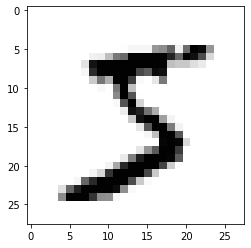

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0], cmap='Greys')
plt.show()

In [7]:
import sys
for x in x_train[0]:
    for i in x:
        sys.stdout.write("%3d" %i)
    sys.stdout.write("\n")

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [8]:
# 정규화
x_train=x_train.reshape(x_train.shape[0],784)
x_train=x_train/255.    # 실수로 나누기를 해 값을 실수로 만듦

In [9]:
x_train.shape

(60000, 784)

In [10]:
x_test = x_test.reshape(x_test.shape[0], 784).astype('float64') / 255

In [11]:
y_class_train[0]

5

In [12]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_class_train, 10)
y_test = to_categorical(y_class_test, 10)

In [13]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import numpy as np
import os

In [15]:
seed = 2020
np.random.seed(seed)

In [16]:
# 모델 프레임 설정
model = Sequential([
    Dense(512, input_dim=784, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 모델 실행 환경 설정 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [19]:
modelpath = MODEL_DIR + "mnist.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [20]:
# 모델의 실행
history = model.fit(x_train, y_train, validation_split=0.2, 
                    epochs=300, batch_size=2000, verbose=0, 
                    callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.30123, saving model to ./model/mnist.hdf5

Epoch 00002: val_loss improved from 0.30123 to 0.21733, saving model to ./model/mnist.hdf5

Epoch 00003: val_loss improved from 0.21733 to 0.17609, saving model to ./model/mnist.hdf5

Epoch 00004: val_loss improved from 0.17609 to 0.15067, saving model to ./model/mnist.hdf5

Epoch 00005: val_loss improved from 0.15067 to 0.13293, saving model to ./model/mnist.hdf5

Epoch 00006: val_loss improved from 0.13293 to 0.12268, saving model to ./model/mnist.hdf5

Epoch 00007: val_loss improved from 0.12268 to 0.11076, saving model to ./model/mnist.hdf5

Epoch 00008: val_loss improved from 0.11076 to 0.10326, saving model to ./model/mnist.hdf5

Epoch 00009: val_loss improved from 0.10326 to 0.09991, saving model to ./model/mnist.hdf5

Epoch 00010: val_loss improved from 0.09991 to 0.09967, saving model to ./model/mnist.hdf5

Epoch 00011: val_loss improved from 0.09967 to 0.09439, saving model to ./model/mni

In [21]:
from tensorflow.keras.models import load_model
del model

In [22]:
model = load_model('model/mnist.hdf5')
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test, verbose=2)[1]))

10000/10000 - 0s - loss: 0.0694 - accuracy: 0.9798

 Test Accuracy: 0.9798


In [23]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

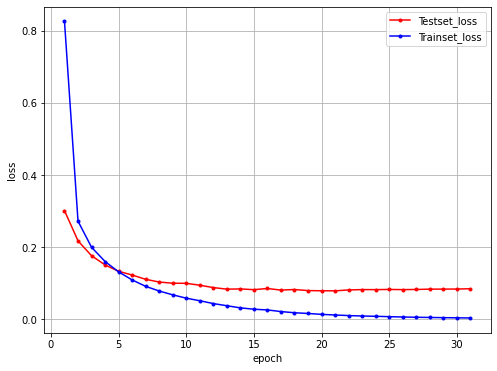

In [24]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
#plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [25]:
# 글자의 크기, 회전, 변형에 취약함.
# 한 픽셀당 노드 하나 > 픽셀이 한 칸씩 밀렸을 때, 인지하지 못 함.